In [1]:
%%bash
ls

Inicio pruebas trix.ipynb
Readme.md
Tecnicos.py
__pycache__
periodo10.csv
periodo3.csv
periodo30.csv
periodo5.csv
periodo60.csv
periodo7.csv


In [1]:
import time
from Tecnicos import Tecnichal_Analisis as tc
from Tecnicos import Back_Testing as BT
import pandas as pd
from pandas import DataFrame, Series
import mpl_finance as finance
import matplotlib.pylab as plt
import numpy as np
import os
import itertools

In [2]:
df=pd.read_csv("periodo3.csv",header=[0,1],index_col=[0])
df.index = pd.to_datetime(df.index)
df=df.sort_index()

In [3]:
A=BT.Resumen_acomulado_estrategia_1(df,period=5,period_mid=5,resample="1W")

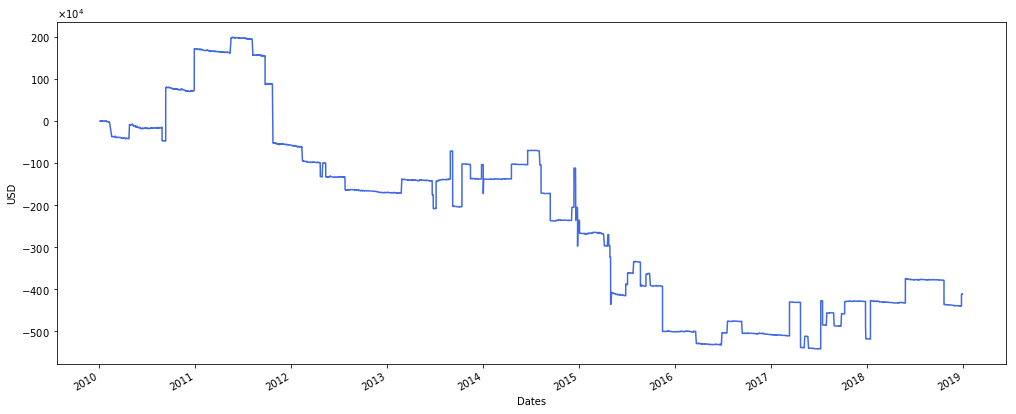

In [5]:
BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False)

In [4]:
B=BT.Resumen_acomulado_estrategia_2(df,period=5,period_mid=5,resample="1W")

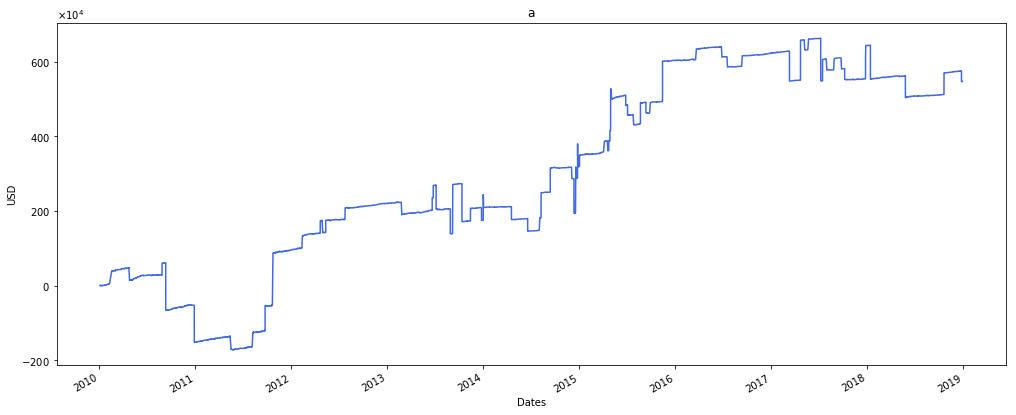

In [6]:
BT.Plot_Resumen_estrategia(B,plot_cumulative=True,plot_rounds=False,title="a")


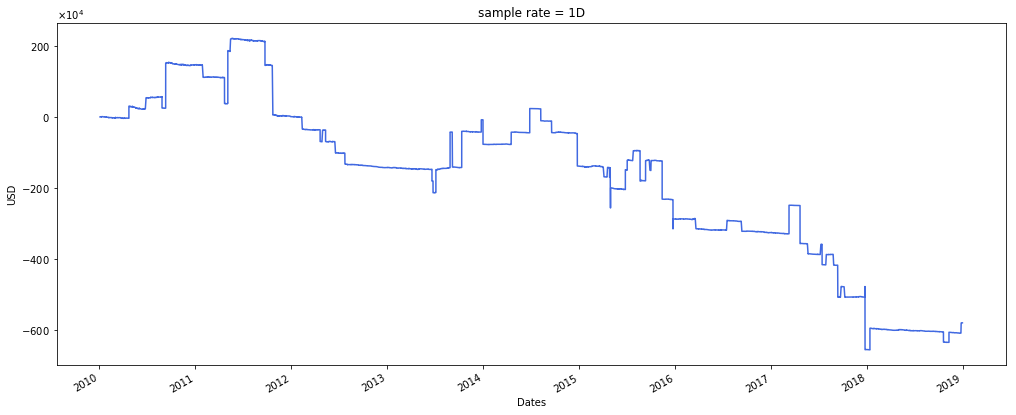

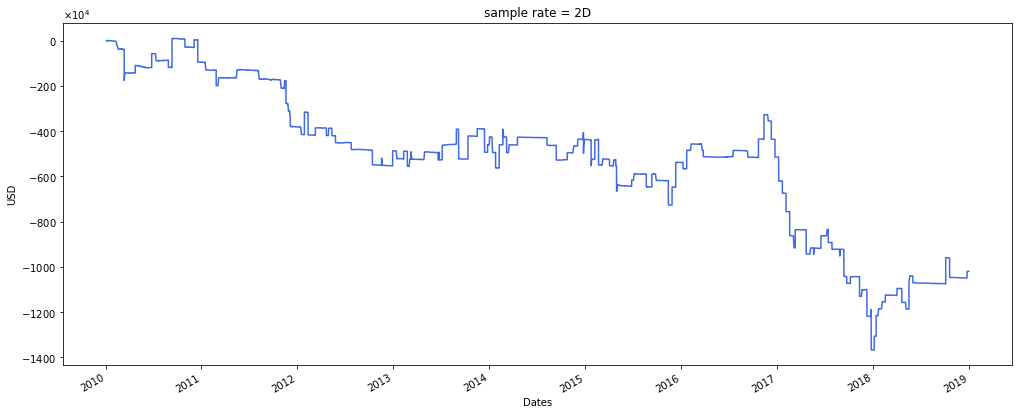

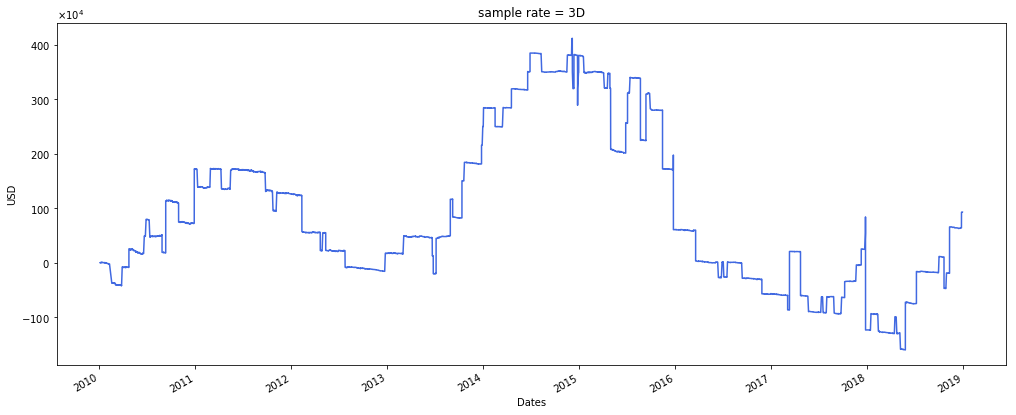

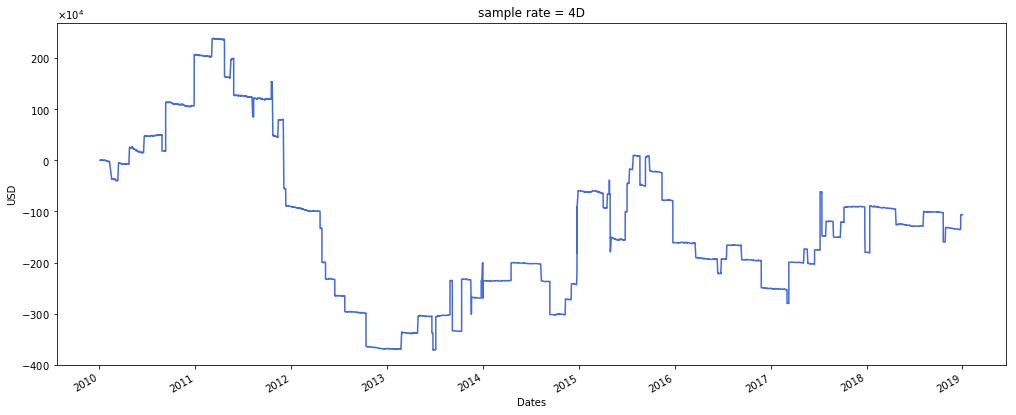

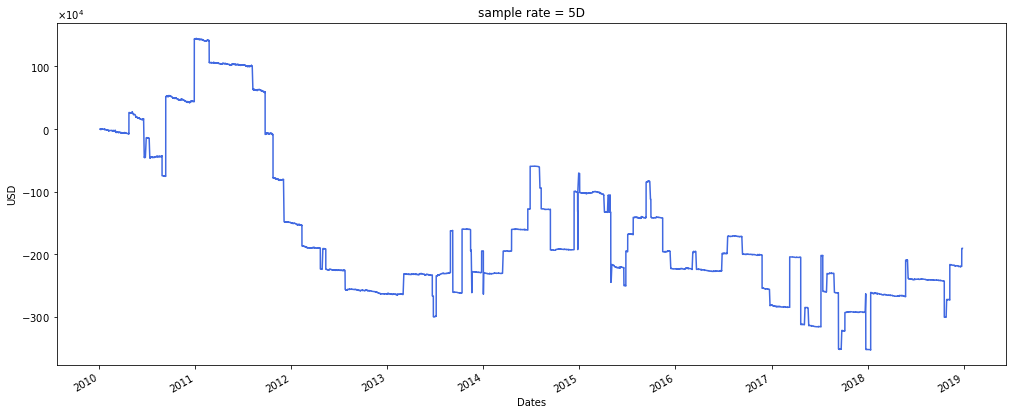

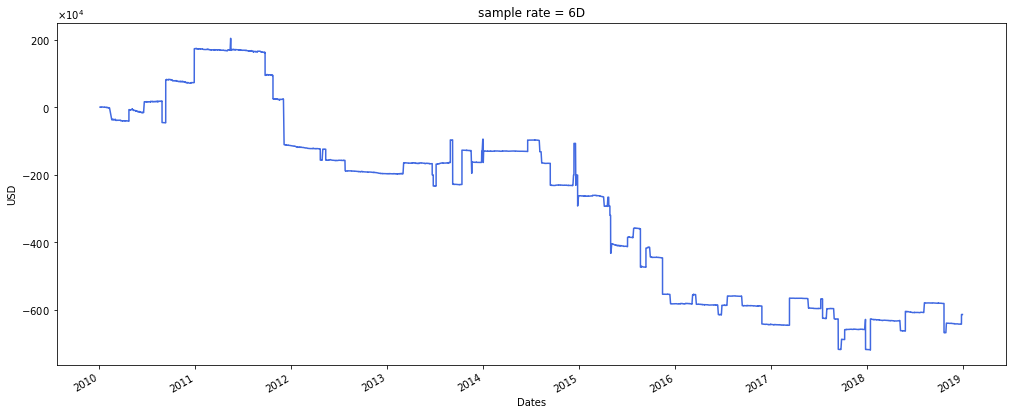

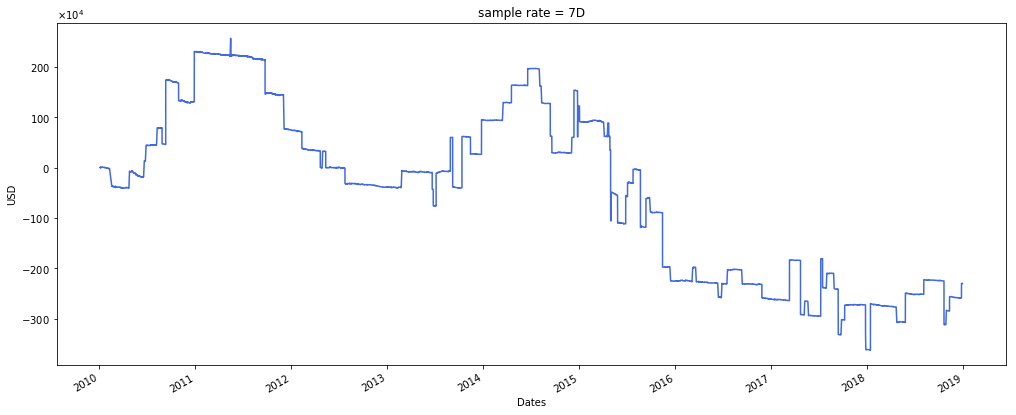

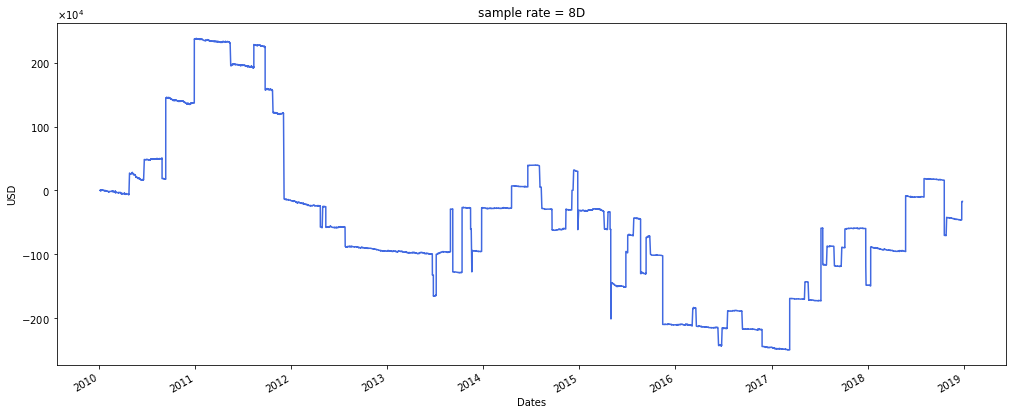

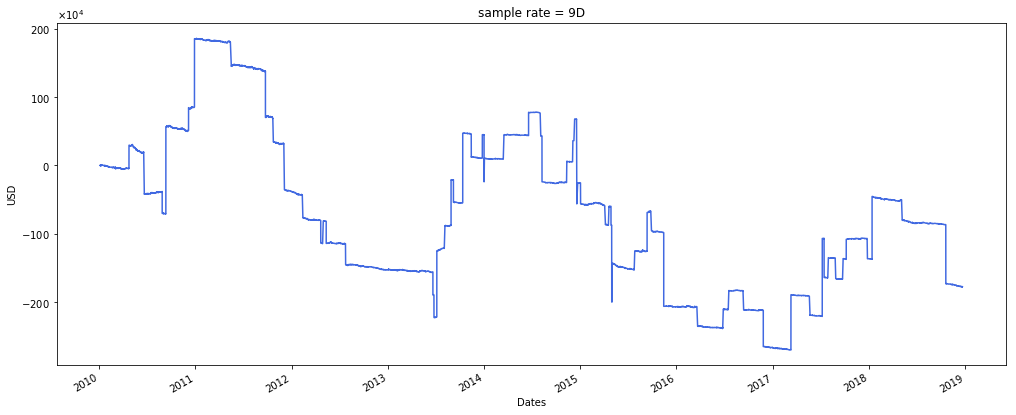

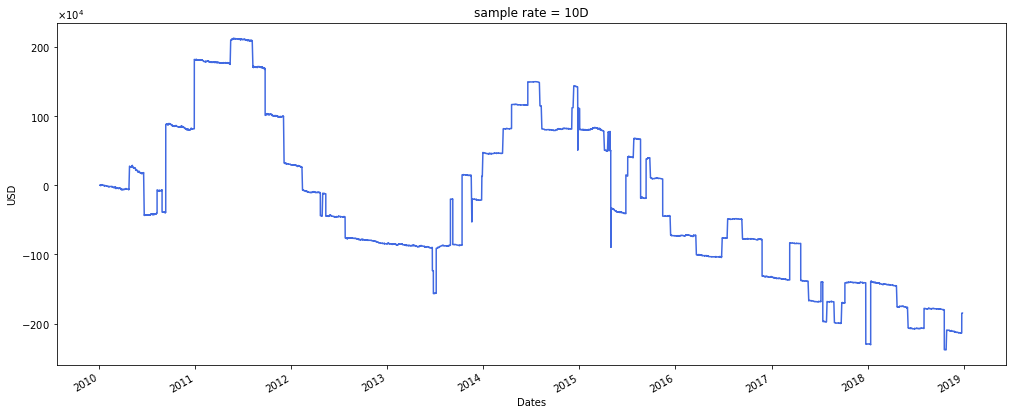

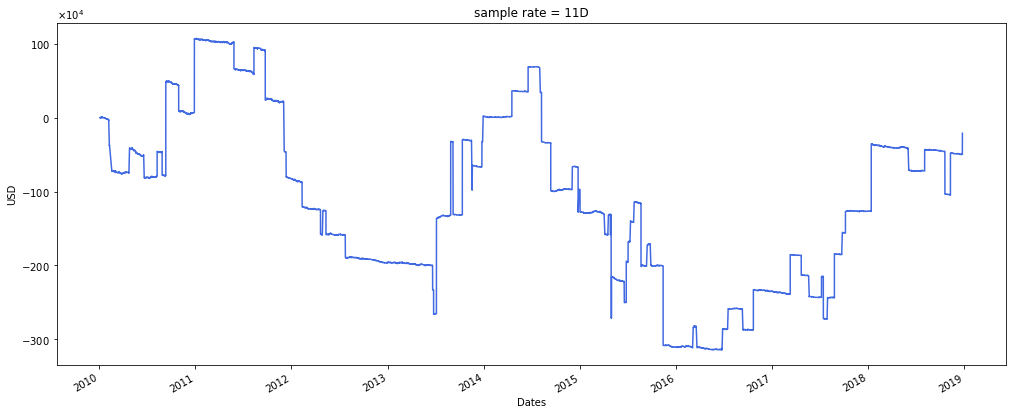

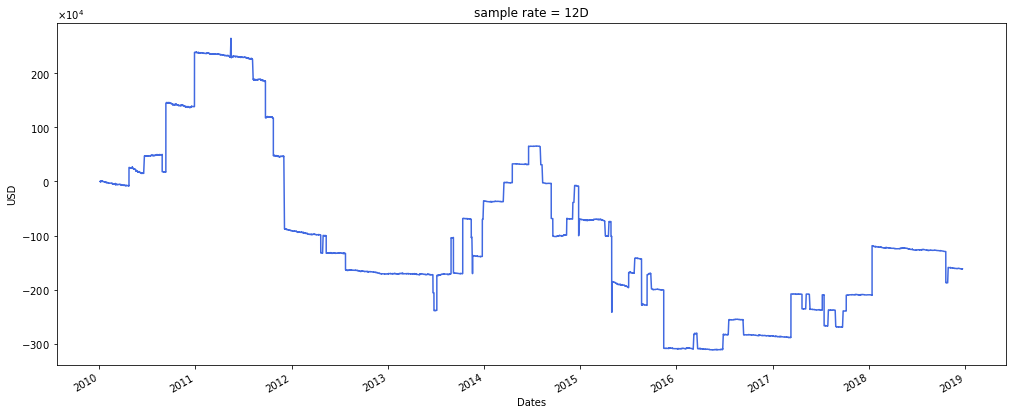

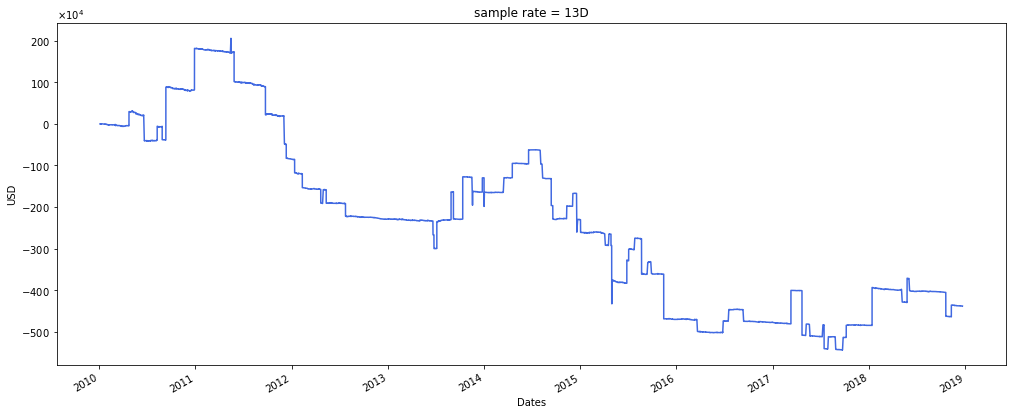

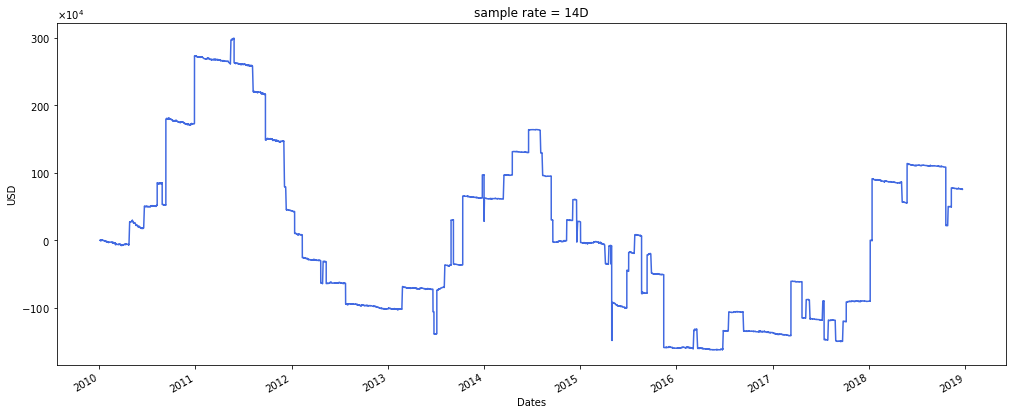

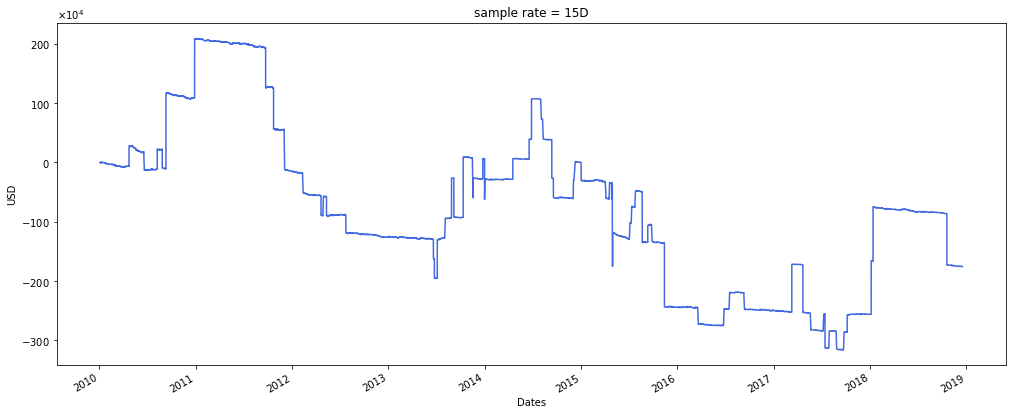

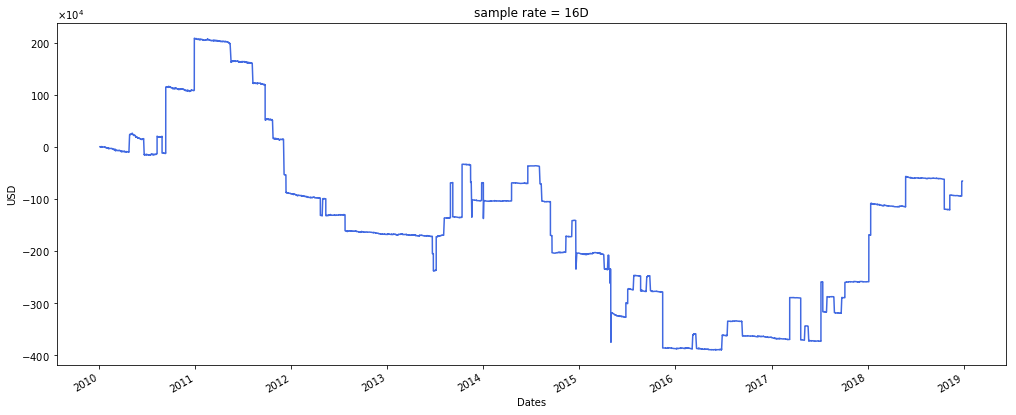

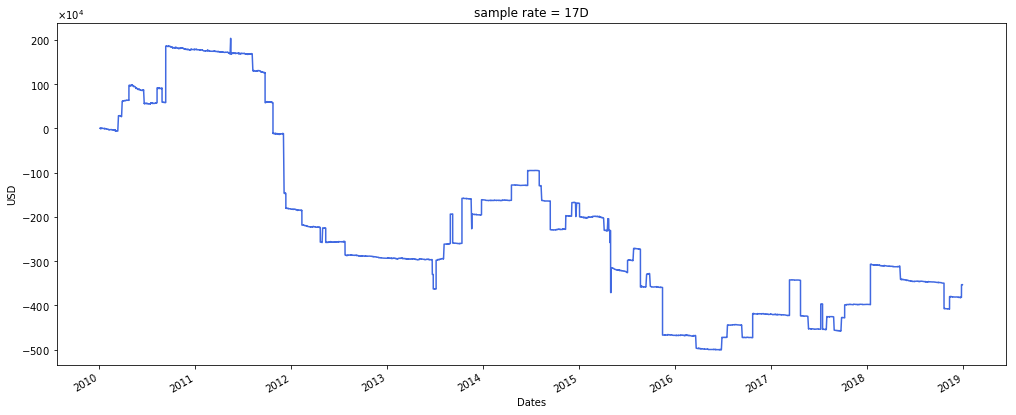

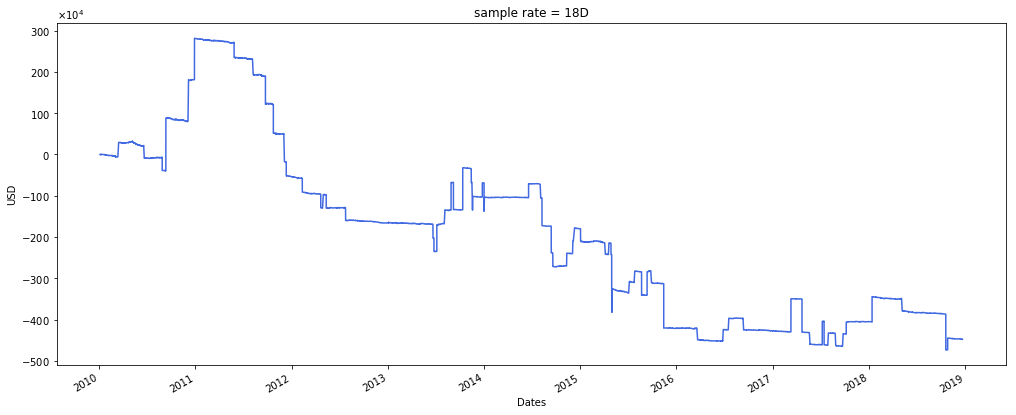

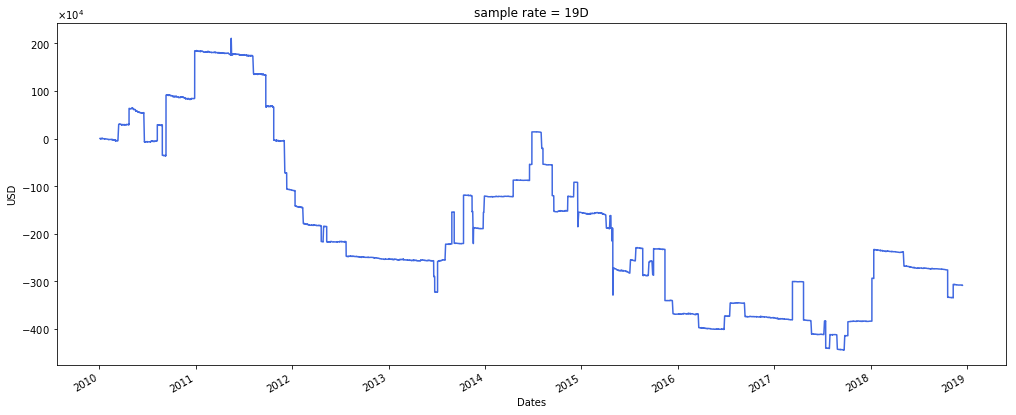

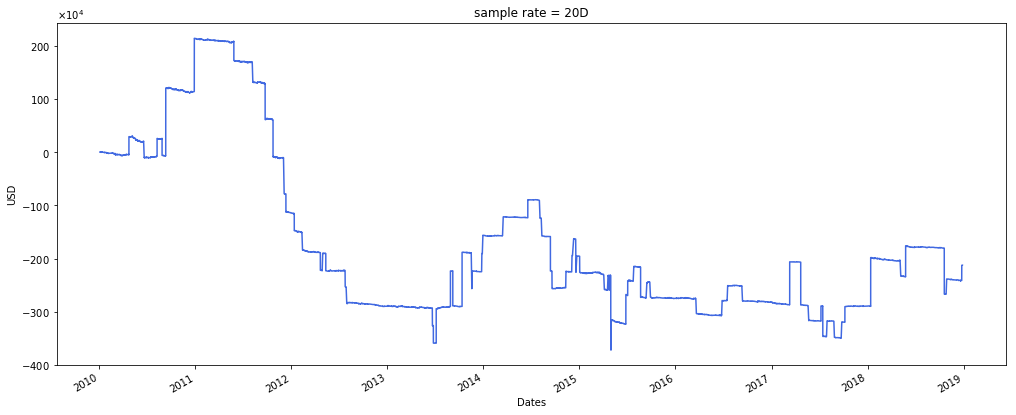

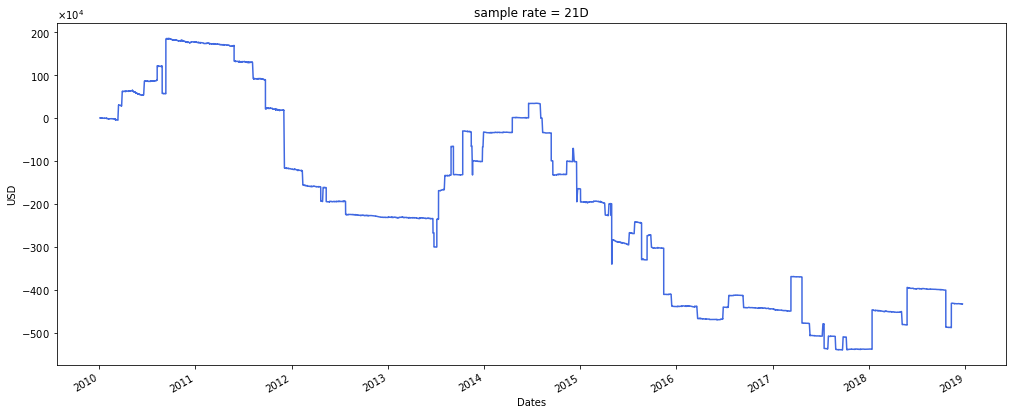

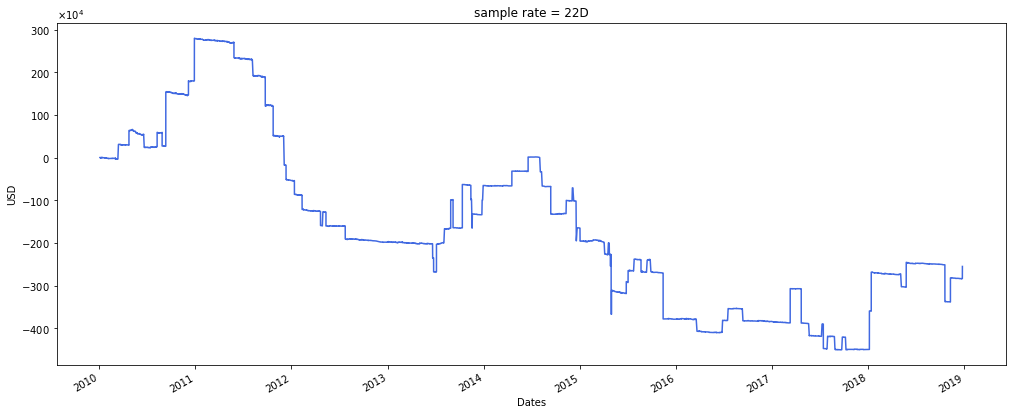

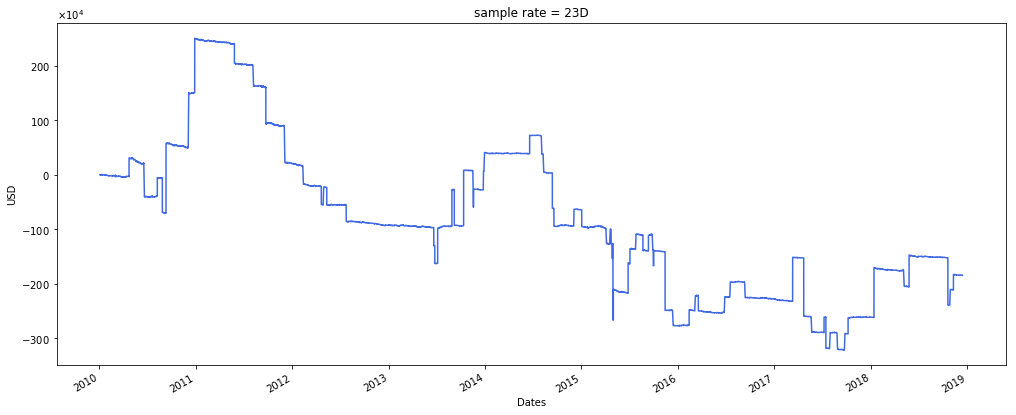

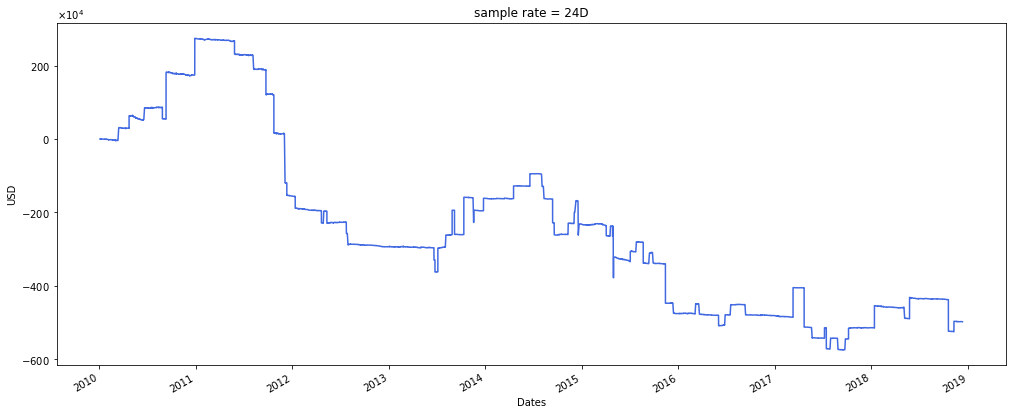

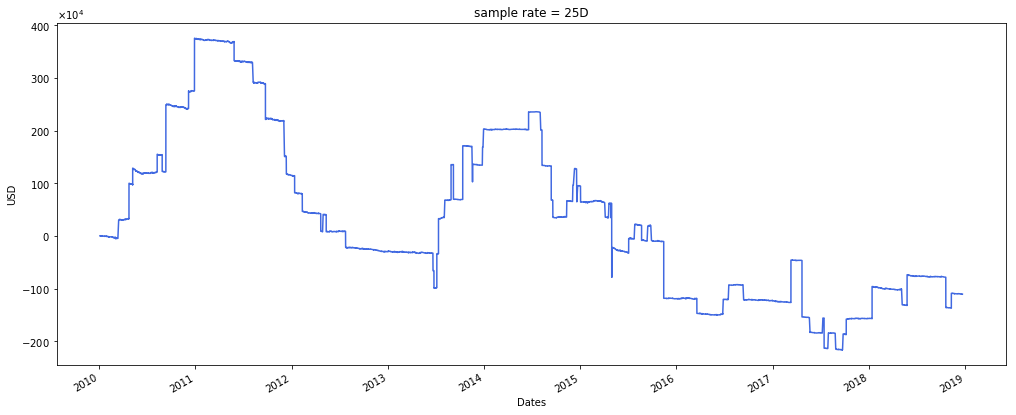

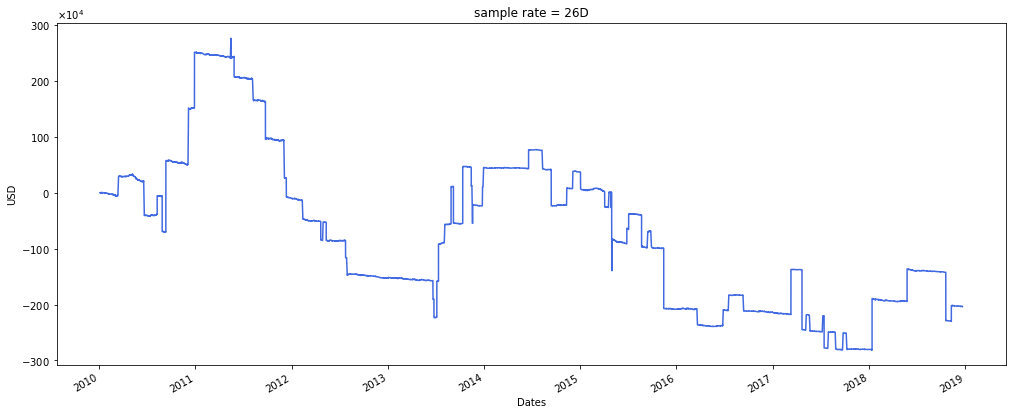

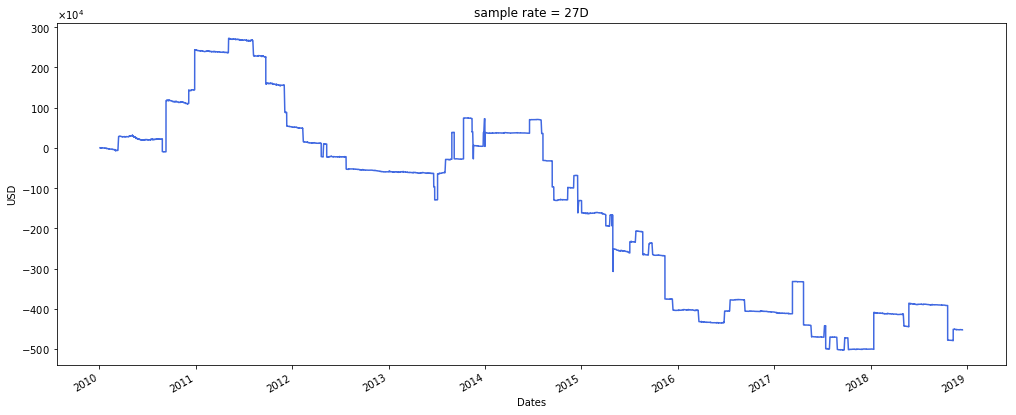

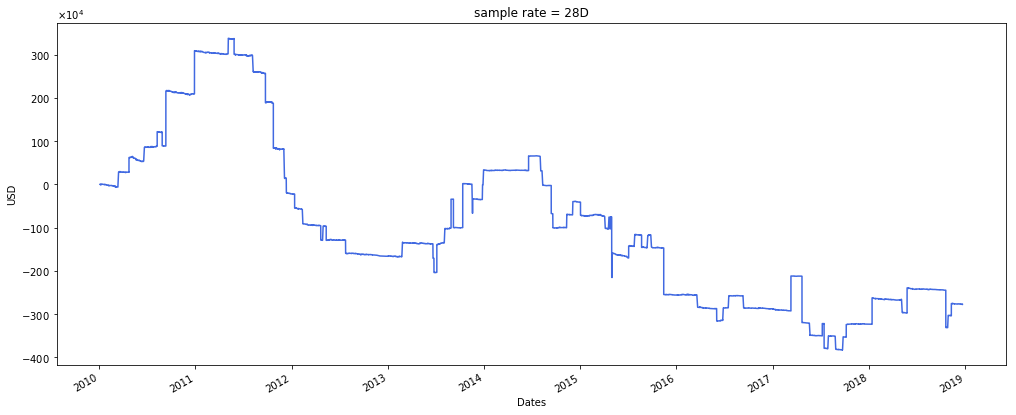

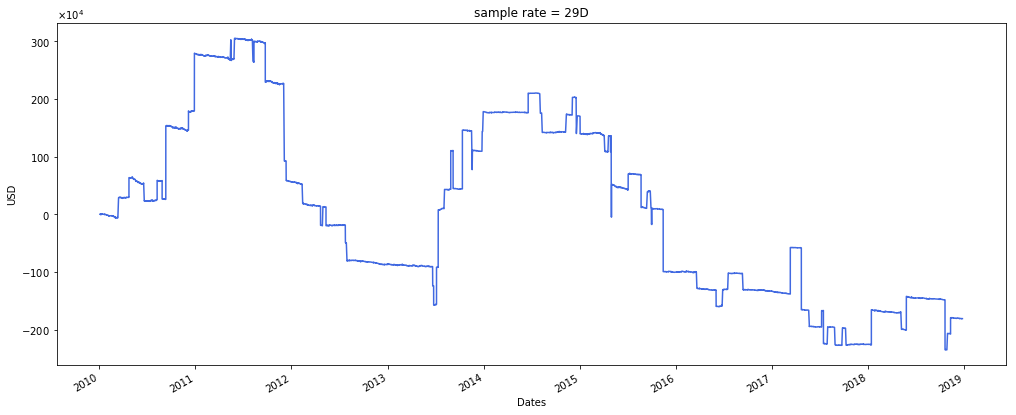

In [4]:
for i in range(1,30):
    resample_rate=str(i)+"D"
    A=BT.Resumen_acomulado_estrategia_1(df,period=5,period_mid=5,resample=resample_rate)
    BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False,title="sample rate = {}".format(resample_rate))
    plt.show()

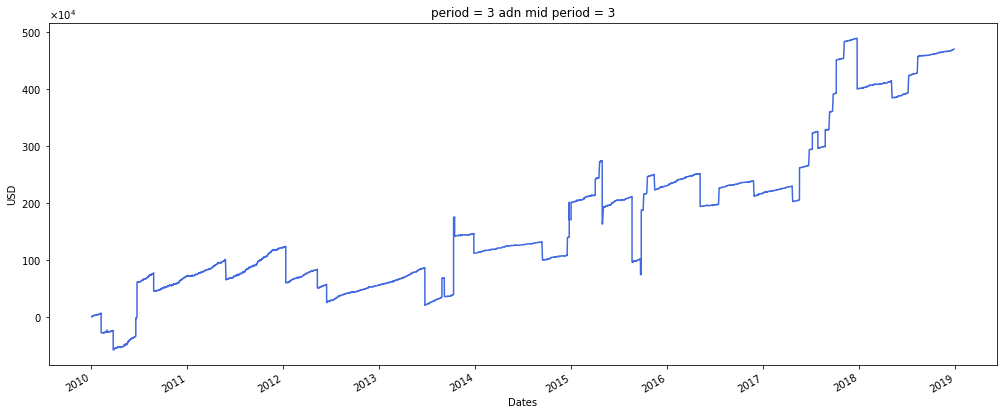

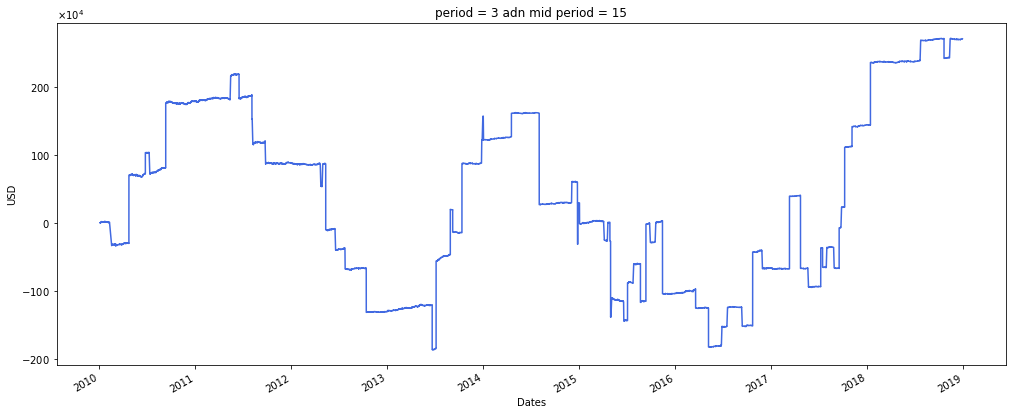

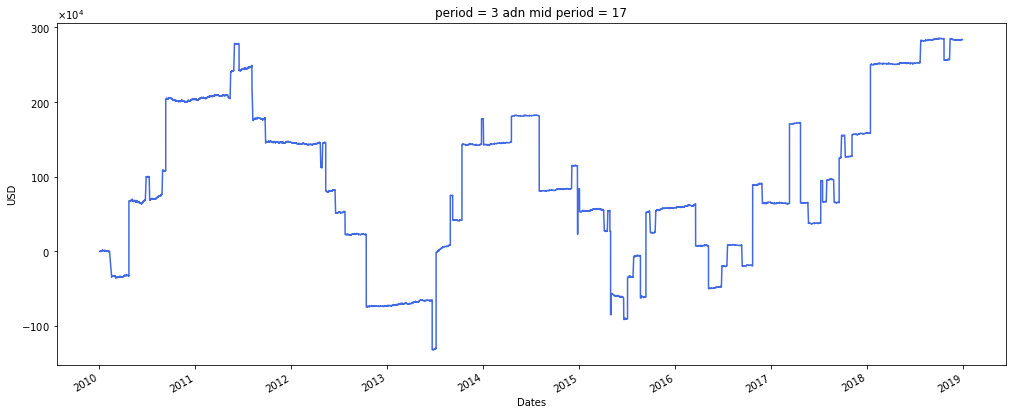

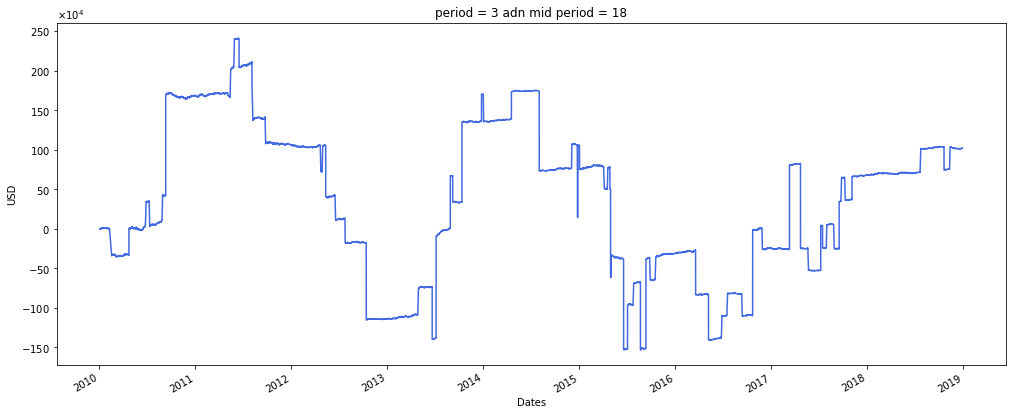

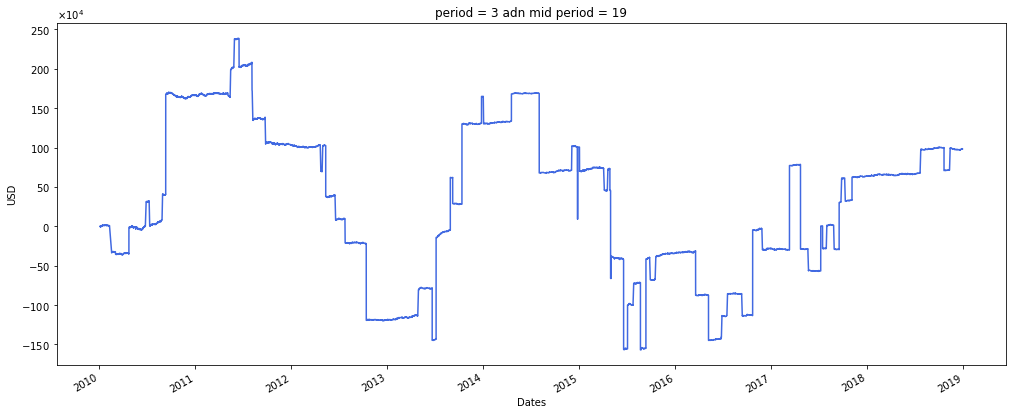

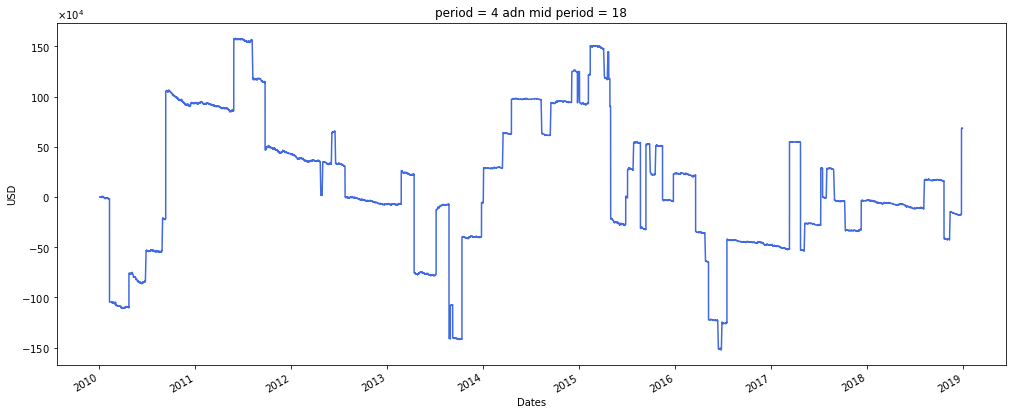

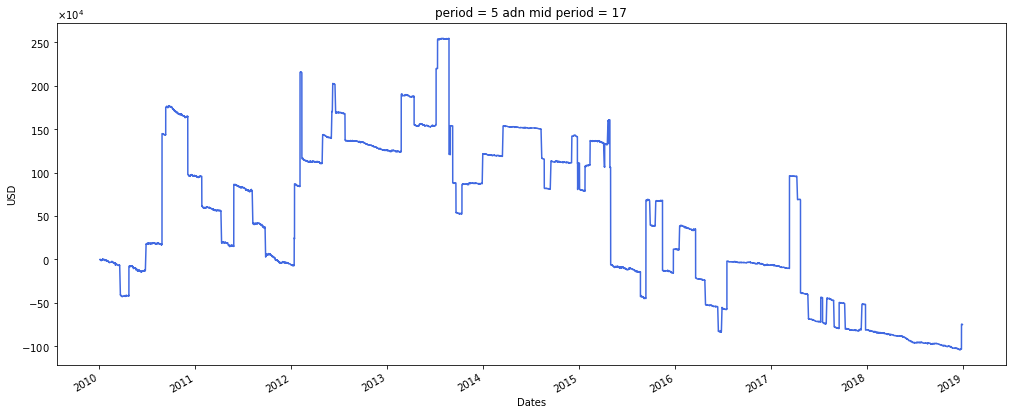

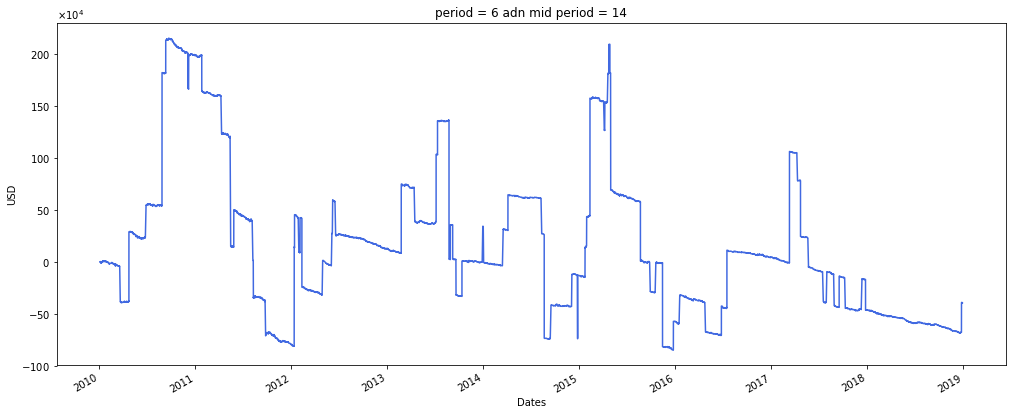

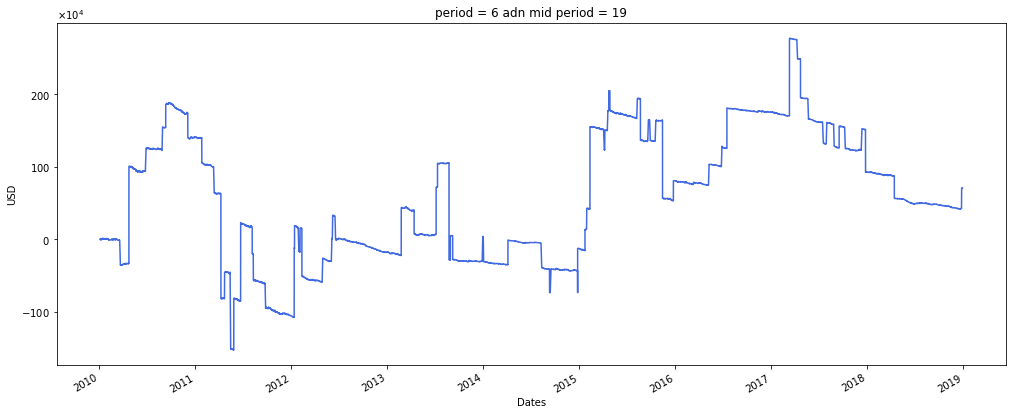

In [ ]:
a=range(3,20)
for i in itertools.product(a,repeat=2):
    period=i[0]
    period_mid=i[1]
    A=BT.Resumen_acomulado_estrategia_1(df,period=period,period_mid=period_mid,resample="1W")
    if np.abs(np.trapz(A["Cumulative"])/len(A)) > 1E5:
        BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False,title="period = {} adn mid period = {}".format(period,period_mid))
        plt.show()

In [1]:
import time
from Tecnicos import Tecnichal_Analisis as tc
from Tecnicos import Back_Testing as BT
import pandas as pd
from pandas import DataFrame, Series
import mpl_finance as finance
import matplotlib.pylab as plt
import numpy as np
import os
import itertools
df=pd.read_csv("periodo3.csv",header=[0,1],index_col=[0])
df.index = pd.to_datetime(df.index)
df=df.sort_index()

In [ ]:
from scipy.optimize import curve_fit
def l(x,a,b):
    return a*x+b
a=range(3,20)
for i in itertools.product(a,repeat=2):
    period=i[0]
    period_mid=i[1]
    A=BT.Resumen_acomulado_estrategia_2(df,period=period,period_mid=period_mid,resample="1W")
    if np.abs(np.corrcoef(A["Time past"],A["Cumulative"])[0,1]) >= 0.95:
        popt, pcov = curve_fit(l, A["Time past"], A["Cumulative"])
        BT.Plot_Resumen_estrategia(A,plot_cumulative=True,plot_rounds=False,title="Period = {} and Middle Period = {}".format(period,period_mid))
        l(A["Time past"], *popt).plot(color="forestgreen",style="--",label="Ajuste")
        plt.legend()
        plt.savefig("Cosa.png")
        plt.show()
        break

In [2]:
A=BT.Resumen_acomulado_estrategia_1(df,period=5,period_mid=5,resample="1W")

In [4]:
np.corrcoef(A["Time past"],A["Cumulative"])

array([[ 1.        , -0.89408401],
       [-0.89408401,  1.        ]])

In [12]:
archivo=open("Resultados.txt","w")
archivo.write("Period"+"\t"+"Period mid\n")
a=range(3,5)
for i in itertools.product(a,repeat=2):
    period=i[0]
    period_mid=i[1]
    archivo.write(str(period)+"\t"+str(period_mid)+"\n")
archivo.close()